## Learning Objectives

- **Practice** using different types of plots.
- **Use** Pandas methods for plotting.
- **Create** line plots, bar plots, histograms, and box plots.
- **Know** when to use Seaborn or advanced Matplotlib

## Lesson Guide

- [Line Plots](#line-plots)
- [Bar Plots](#bar-plots)
- [Histograms](#histograms)
    - [Grouped Histograms](#grouped-histograms)
    
    
- [Box Plots](#box-plots)
    - [Grouped Box Plots](#grouped-box-plots)
    
- [Scatter Plots](#scatter-plots)
- [Using Seaborn](#using-seaborn)
- [OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)](#matplotlib)
- [OPTIONAL: Additional Topics](#additional-topics)

- [Summary](#summary)

### Introduction

In this lab, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

Toward the end of the lab, we will show some motivational plots using Seaborn, a popular statistics plotting library, as well as go more in-depth about how Matplotlib works.

### Pandas Plotting Documentation

[Link to Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Increase default figure and font sizes for easier viewing.
plt.figure(figsize=(20,10))
plt.style.use("fivethirtyeight")


<Figure size 1440x720 with 0 Axes>

### Create fake data for examples.

In [2]:
df =pd.DataFrame(np.random.rand(10,4),
                 columns = ["col1", "col2", "col3", "col4"],
                 index = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"])
df

col1      col2      col3      col4
a  0.489985  0.898958  0.042054  0.501912
b  0.178349  0.662120  0.367803  0.434495
c  0.427982  0.744597  0.003460  0.658501
d  0.515838  0.732028  0.941204  0.227527
e  0.677736  0.619499  0.938856  0.252793
f  0.317700  0.241181  0.030441  0.188170
g  0.958408  0.028199  0.965680  0.662819
h  0.147881  0.670080  0.807690  0.463702
i  0.193979  0.114997  0.570821  0.291237
j  0.405036  0.215251  0.419586  0.171530

### Choosing the right type of visualization

The choice of visualization should depend what you are trying to show. Here is a helpful flowchart that you can use to determine the best type of visualizations.

![Chart Suggestions](../assets/images/chart_suggestions.png)

### Load in data sets for visualization examples.

The Boston data dictionary can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [3]:
# Read in the Boston housing data.
housing = pd.read_csv("data/boston_housing_data.csv")

# Read in the drinks data.
drinks = pd.read_csv("data/drinks.csv")

# Read in the ufo data.
ufo = pd.read_csv("data/ufo.csv")

In [4]:
ufo["time"] = pd.to_datetime(ufo.Time)
ufo["year"] = ufo.time.dt.year

<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---

- **Objective:** **Use** Pandas methods for plotting.
- **Objective:** **Create** line plots, bar plots, histograms, and box plots.

In [5]:
# Count the number of ufo reports each year (and sort by year).
ufo.year.value_counts().sort_index(ascending=False)

2014    5382
2013    7003
2012    7263
2011    5089
2010    4154
        ... 
1935       1
1934       1
1933       1
1931       2
1930       2
Name: year, Length: 82, dtype: int64

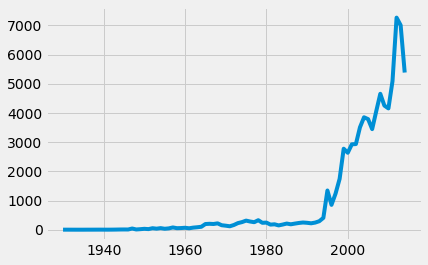

In [6]:
# Compare with line plot -- UFO sightings by year. (Ordering by year makes sense.)
ufo.year.value_counts().sort_index().plot()

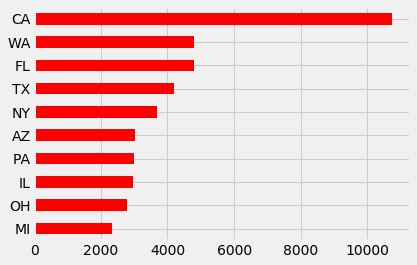

In [7]:
# COMMON MISTAKE: Don't use a line plot when the x-axis cannot be ordered sensically!

# For example, ordering by continent below shows a trend where no exists ... 
#    it would be just as valid to plot the continents in any order.

# So, a line plot is the wrong type of plot for this data.
# Always think about what you're plotting and if it makes sense.

ufo.State.value_counts(ascending=True).tail(10).plot(kind="barh", color = "red")

**Important:** A line plot is the wrong type of plot for this data. Any set of countries can be rearranged misleadingly to illustrate a negative trend, as we did here. Due to this, it would be more appropriate to represent this data using a bar plot, which does not imply a trend based on order.

### Using a `DataFrame` and Matplotlib commands, we can get fancy.

Text(0, 0.5, 'State')

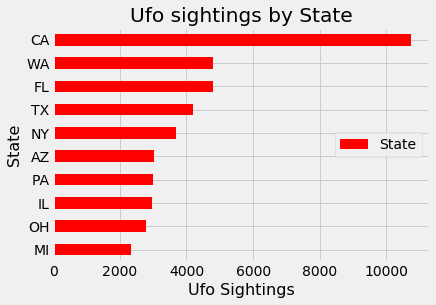

In [17]:
ufo_fig = ufo.State.value_counts(ascending=True).tail(10).plot(kind="barh", color = "red")

# Set the title.
ufo_fig.set_title("Ufo sightings by State")

# Move the legend.
ufo_fig.legend(loc=5)

# x-axis labels
ufo_fig.set_xlabel("Ufo Sightings", fontsize = 16)
# y-axis labels
ufo_fig.set_ylabel("State", fontsize = 16)


### Challenge: Create a bar chart using `col1` and `col2`.

- Give the plot a large title of your choosing. 
- Move the legend to the lower-left corner.

- Do the same thing but with horizontal bars.
- Move the legend to the upper-right corner.

### Stacked works on horizontal bar charts.

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


In [18]:
# Sort the beer column and mentally split it into three groups.
drinks.beer_servings.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

Text(0.5, 0, 'Beer Servings')

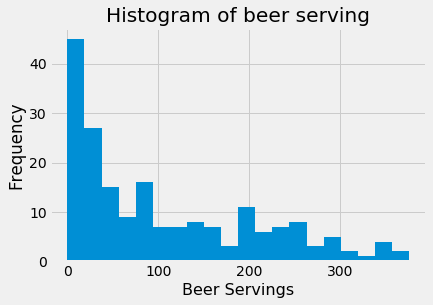

In [19]:
# Compare the above with histogram.
# About how many of the points above are in the groups 1-125, 125-250, and 250-376?
fig_hist = drinks.beer_servings.plot(kind = "hist", bins=20)
# Set the title.
fig_hist.set_title("Histogram of beer serving")
# x-axis labels
fig_hist.set_xlabel("Beer Servings", fontsize = 16)


In [20]:
# Try more bins — it takes the range of the data and divides it into 20 evenly spaced bins.


Text(0.5, 0, 'Beer Servings')

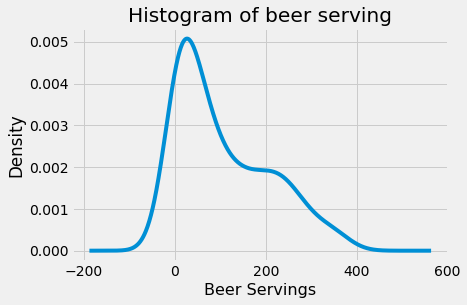

In [21]:
# Compare with density plot (smooth version of a histogram).
fig_hist = drinks.beer_servings.plot(kind = "density")
# Set the title.
fig_hist.set_title("Histogram of beer serving")
# x-axis labels
fig_hist.set_xlabel("Beer Servings", fontsize = 16)

Text(0.5, 0, 'col1')

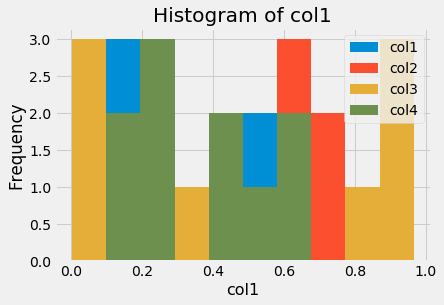

In [22]:
# Making histograms of DataFrames — histogram of random data
fig_hist = df.plot(kind = "hist")
# Set the title.
fig_hist.set_title("Histogram of col1")
# x-axis labels
fig_hist.set_xlabel("col1", fontsize = 16)

### Single Histogram

Text(0.5, 0, 'Beer Servings')

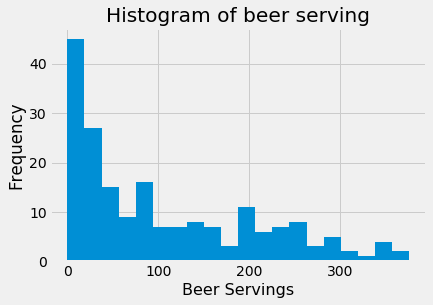

In [23]:
# Compare the above with histogram.
# About how many of the points above are in the groups 1-125, 125-250, and 250-376?
fig_hist = drinks.beer_servings.plot(kind = "hist", bins=20)
# Set the title.
fig_hist.set_title("Histogram of beer serving")
# x-axis labels
fig_hist.set_xlabel("Beer Servings", fontsize = 16)

### Another bins example: Sometimes the binning makes the data look different or misleading.

Text(0.5, 0, 'Beer Servings')

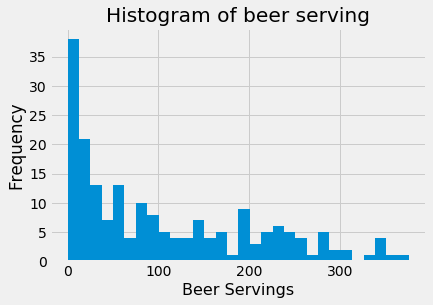

In [24]:
# Compare the above with histogram.
# About how many of the points above are in the groups 1-125, 125-250, and 250-376?
fig_hist = drinks.beer_servings.plot(kind = "hist", bins=30)
# Set the title.
fig_hist.set_title("Histogram of beer serving")
# x-axis labels
fig_hist.set_xlabel("Beer Servings", fontsize = 16)

### Challenge: Create a histogram with pandas for using `MEDV` in the housing data.
- Set the bins to 20.

<a id="grouped-histograms"></a>
### Grouped histograms: Show one histogram for each group.

Text(0.5, 0, 'col1')

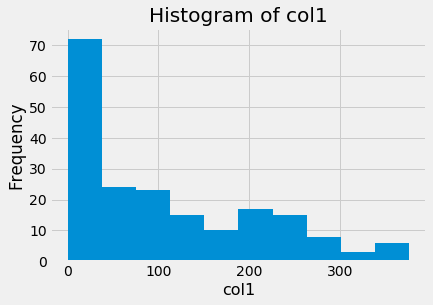

In [25]:
# Making histograms of DataFrames — histogram of random data
fig_hist = drinks.beer_servings.plot(kind = "hist")
# Set the title.
fig_hist.set_title("Histogram of col1")
# x-axis labels
fig_hist.set_xlabel("col1", fontsize = 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cb50a00>,
      dtype=object)

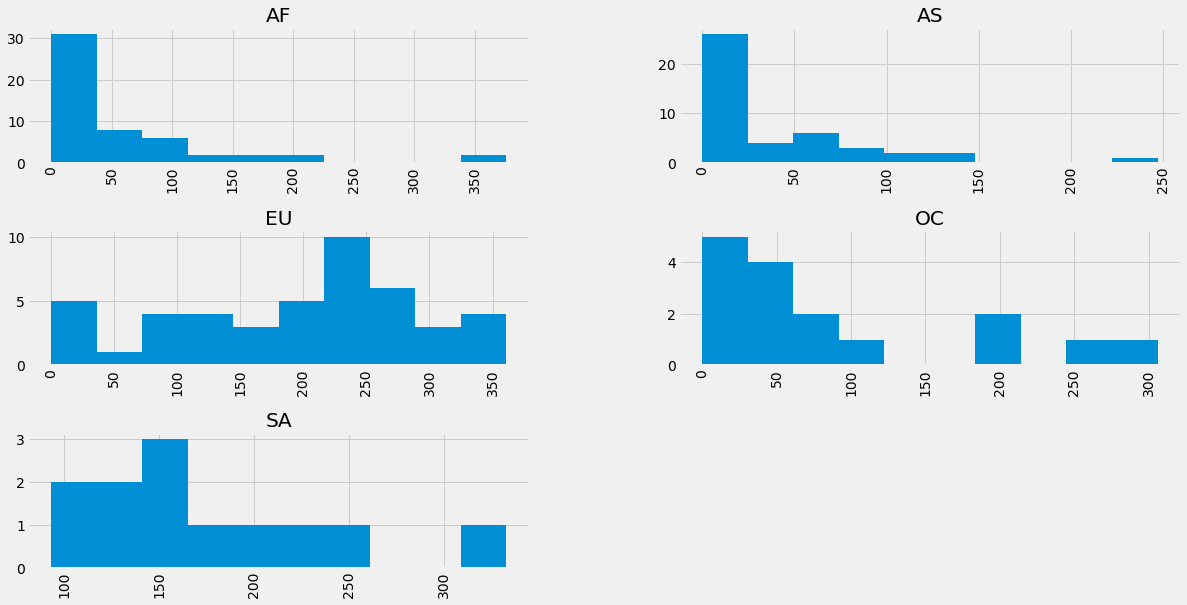

In [26]:
# Histogram of beer servings grouped by continent -- how might these graphs be misleading?
drinks.hist(column="beer_servings", by="continent", figsize=(20,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bfa9a60>,
      dtype=object)

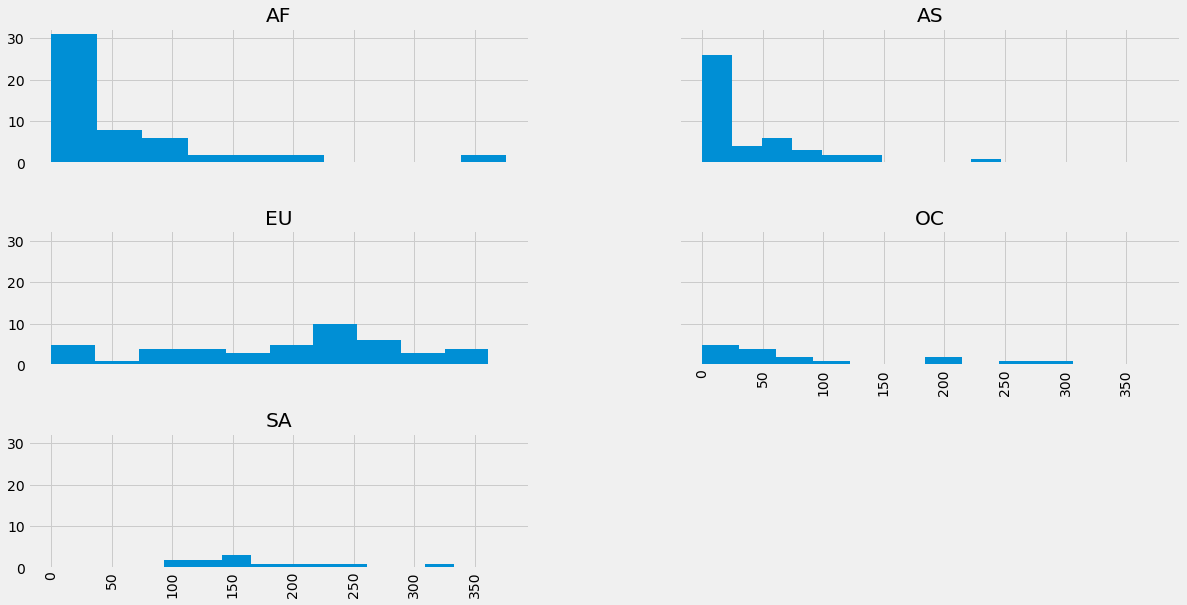

In [27]:
# Share the x- and y-axes.
drinks.hist(column="beer_servings", by="continent", figsize=(20,10), sharex=True, sharey=True)

<a id="box-plots"></a>
## Box Plots: Show quartiles (and outliers) for one or more numerical variables
---

We can use boxplots to quickly summarize distributions.

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(It's more useful than mean and standard deviation for describing skewed distributions.)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

### Let's see how box plots are generated so we can best interpret them.

In [28]:
# Sort the spirit column.
drinks.spirit_servings.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,
         3,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   5,   5,
         6,   6,   6,   7,   9,  11,  11,  12,  13,  15,  15,  16,  16,
        18,  18,  18,  18,  19,  21,  21,  22,  22,  25,  25,  27,  29,
        31,  31,  34,  35,  35,  35,  35,  38,  39,  41,  41,  42,  42,
        44,  46,  50,  51,  55,  56,  57,  60,  61,  63,  63,  65,  67,
        68,  69,  69,  69,  71,  71,  72,  74,  75,  76,  76,  79,  81,
        84,  87,  87,  88,  97,  97,  98,  98, 100, 100, 100, 100, 101,
       104, 104, 112, 114, 114, 114, 117, 117, 118, 118, 122, 122, 124,
       126, 128, 131, 132, 133, 133, 135, 137, 138, 145, 147, 151, 152,
       154, 156, 157, 158, 160, 170, 173, 173, 176, 178, 179, 186, 189,
       192, 194, 200, 202, 205, 215, 215, 216, 221, 226, 237, 24

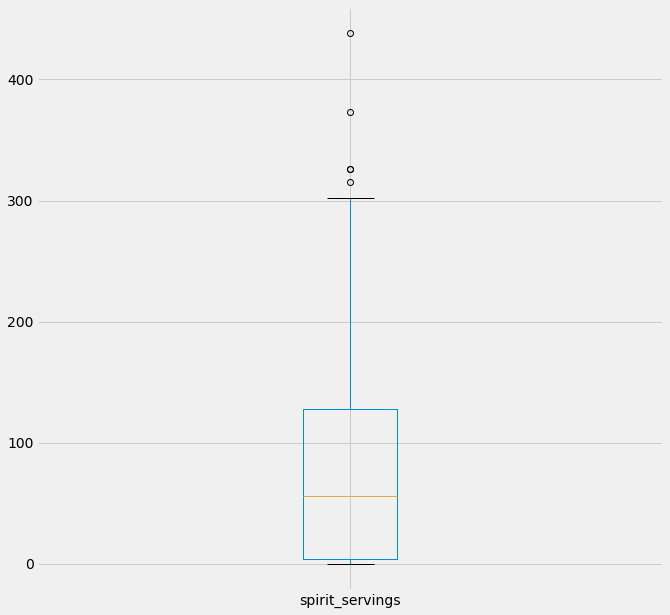

In [29]:
# Compare with box plot.
drinks.spirit_servings.plot(kind='box', figsize=(10,10));

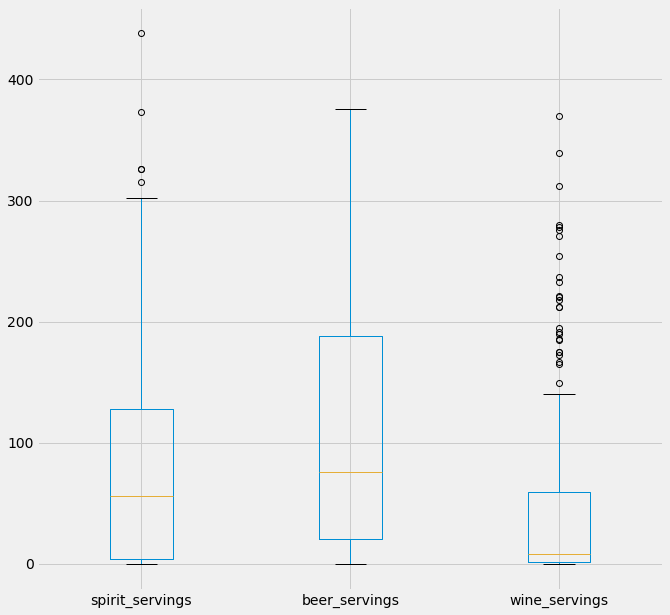

In [30]:
# Include multiple variables.
drinks[["spirit_servings","beer_servings", "wine_servings"]].plot(kind='box', figsize=(10,10));

### How to use a box plot to preview the distributions in the housing data

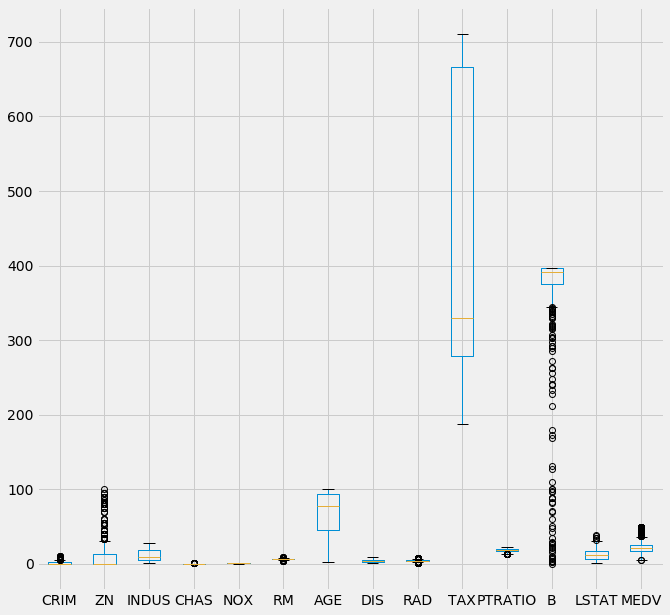

In [31]:
housing.boxplot(figsize=(10,10));

<a id="grouped-box-plots"></a>
### Grouped box plots: Show one box plot for each group.

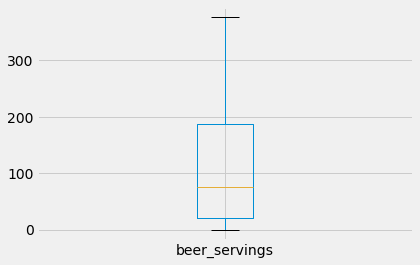

In [32]:
# Reminder: box plot of beer servings
drinks.beer_servings.plot(kind='box');

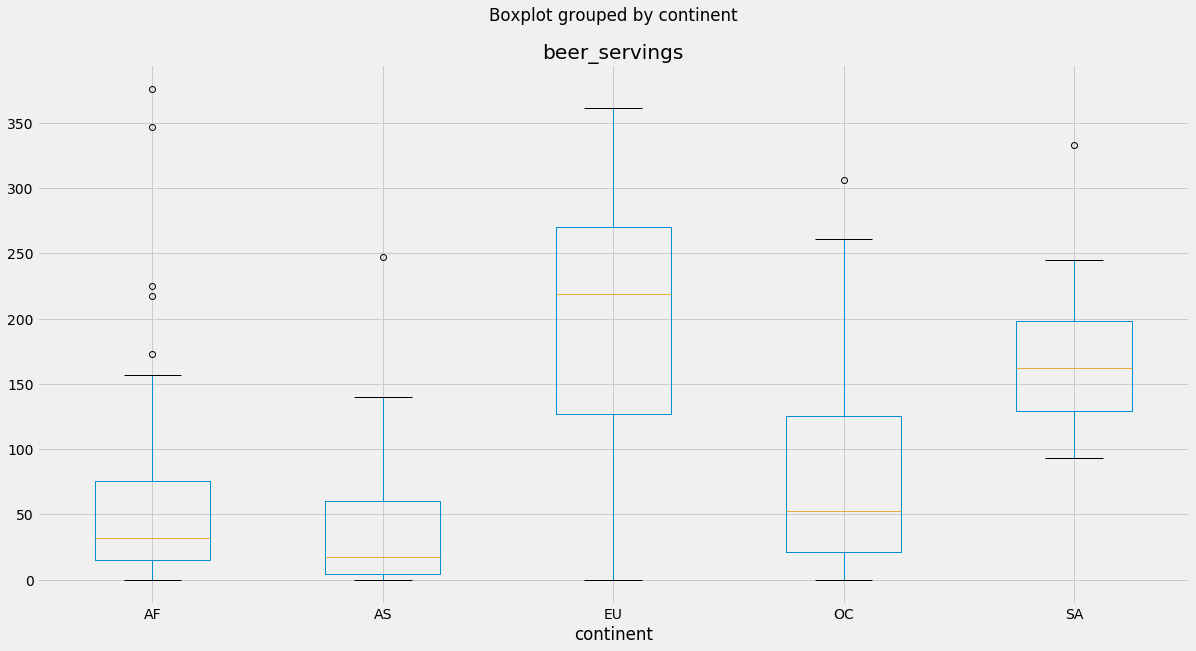

In [33]:
# Box plot of beer servings grouped by continent
drinks.boxplot(column='beer_servings', by='continent', figsize=(20,10));

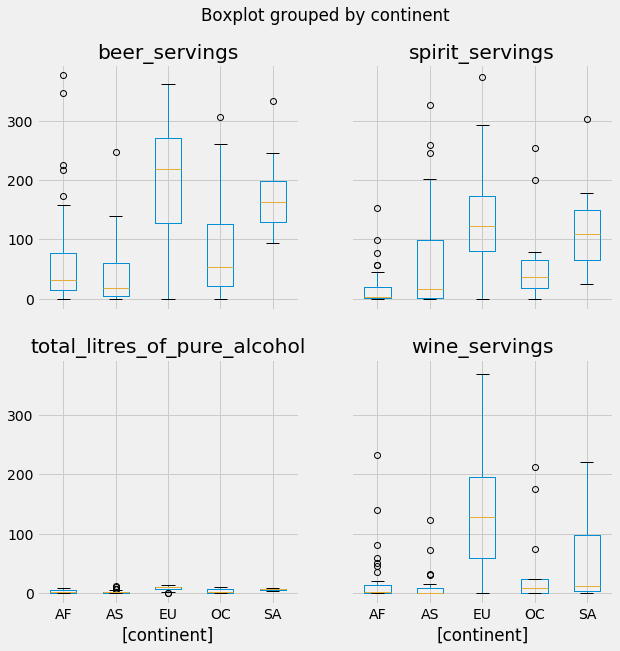

In [34]:
# Box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent', figsize=(10,10));

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


In [35]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [36]:
# Select the beer and wine columns and sort by beer.
drinks[['beer_servings', 'wine_servings']].sort_values('beer_servings').values

array([[  0,   0],
       [  0,  74],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  1,   7],
       [  1,   1],
       [  1,   4],
       [  1,   1],
       [  2,   0],
       [  3,   1],
       [  5,   0],
       [  5,   0],
       [  5,  16],
       [  5,   1],
       [  5,   0],
       [  6,   1],
       [  6,   0],
       [  6,   1],
       [  6,   9],
       [  8,   0],
       [  8,   1],
       [  8,   1],
       [  9,   2],
       [  9,   0],
       [  9,   7],
       [  9,   0],
       [ 12,  10],
       [ 13,   0],
       [ 15,   3],
       [ 15,   1],
       [ 16,   5],
       [ 16,   0],
       [ 17,   1],
       [ 18,   0],
       [ 19,  32],
       [ 19,   2],
       [ 20,   0],
       [ 20,  31],
       [ 21,  11],
       [ 21,  11],
       [ 21,   5],
       [ 21,

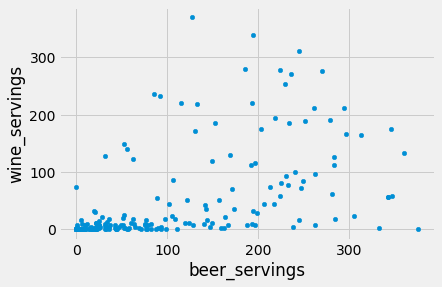

In [37]:
# Compare with scatter plot.
drinks.plot(kind='scatter', x='beer_servings', y='wine_servings');

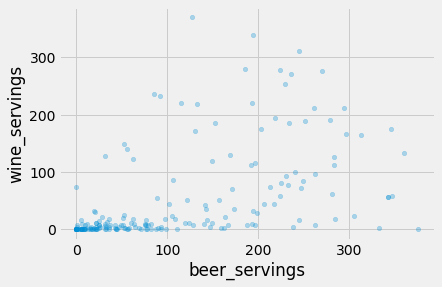

In [38]:
# Add transparency (great for plotting several graphs on top of each other, or for illustrating density!).
drinks.plot(kind='scatter', x='beer_servings', y='wine_servings', alpha=0.3);

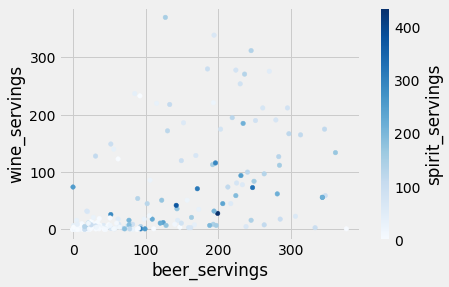

In [39]:
# Vary point color by spirit servings.
drinks.plot(kind='scatter', x='beer_servings', y='wine_servings', c='spirit_servings', colormap='Blues');

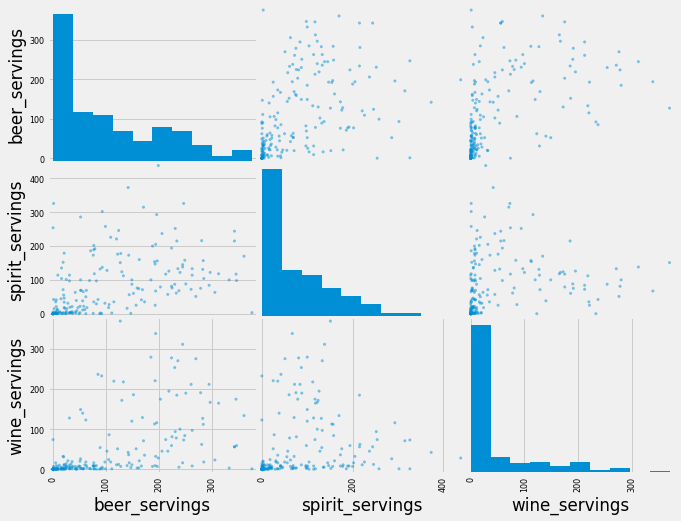

In [40]:
# Scatter matrix of three numerical columns
pd.plotting.scatter_matrix(drinks[['beer_servings', 'spirit_servings', 'wine_servings']], figsize=(10, 8));

### Plotting `DataFrames`

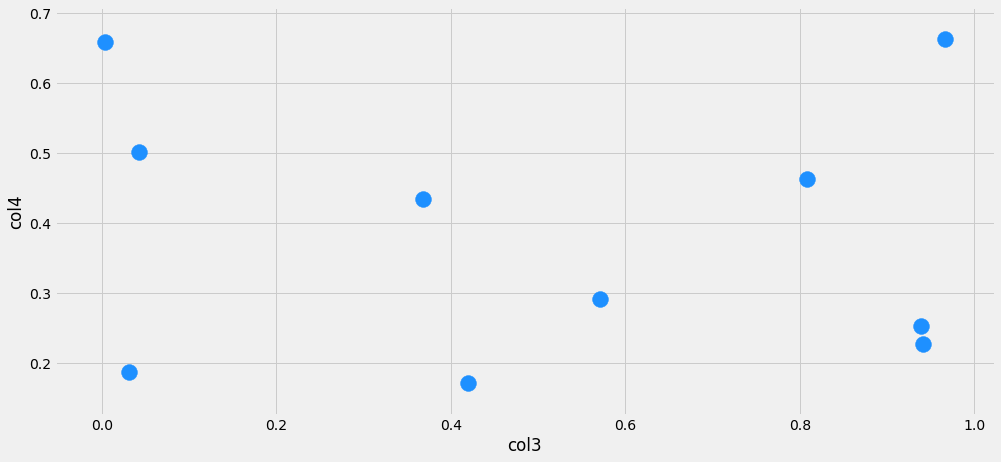

In [41]:
df.plot(x='col3', y='col4', kind='scatter', color='dodgerblue',
        figsize=(15,7), s=250);

### How to view the association between the variables `ZN` and `INDUS` using a scatter plot

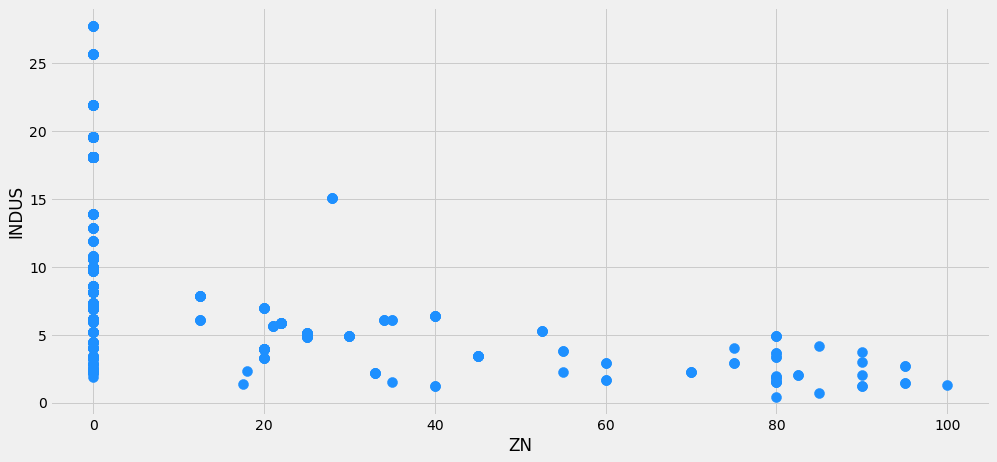

In [42]:
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

### How to use a list comprehension to change the size of the scatter plot dots based on `DIS`

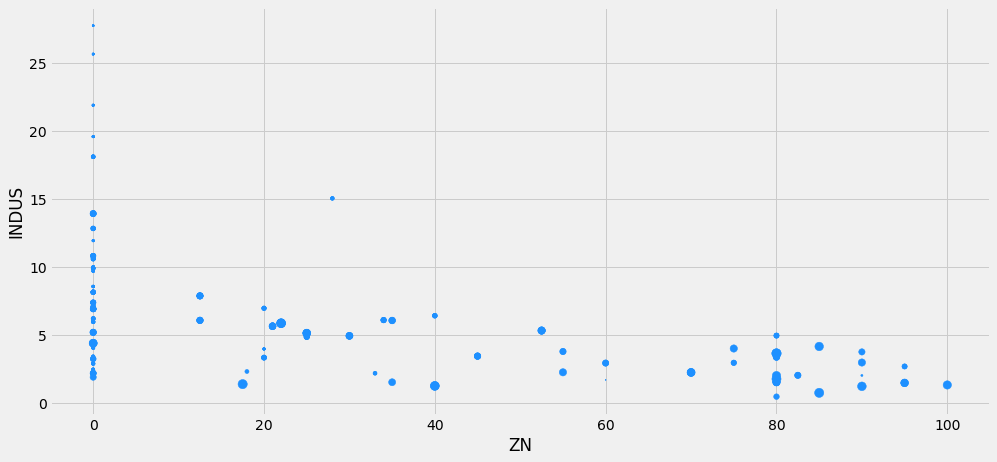

In [43]:
# This list comprehension sets the point sizes ('s') to be the squares of the values in housing['DIS']
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=[x**2 for x in housing['DIS']]);

<a id="seaborn"></a>
## Seaborn `pairplot`

---

- **Objective:** Know when to use Seaborn or advanced Matplotlib.

With the `DataFrame` object `housing`, we will render a pairplot using the Seaborn library.
What do each of the elements represent? Is this more or less useful than the previous plot?

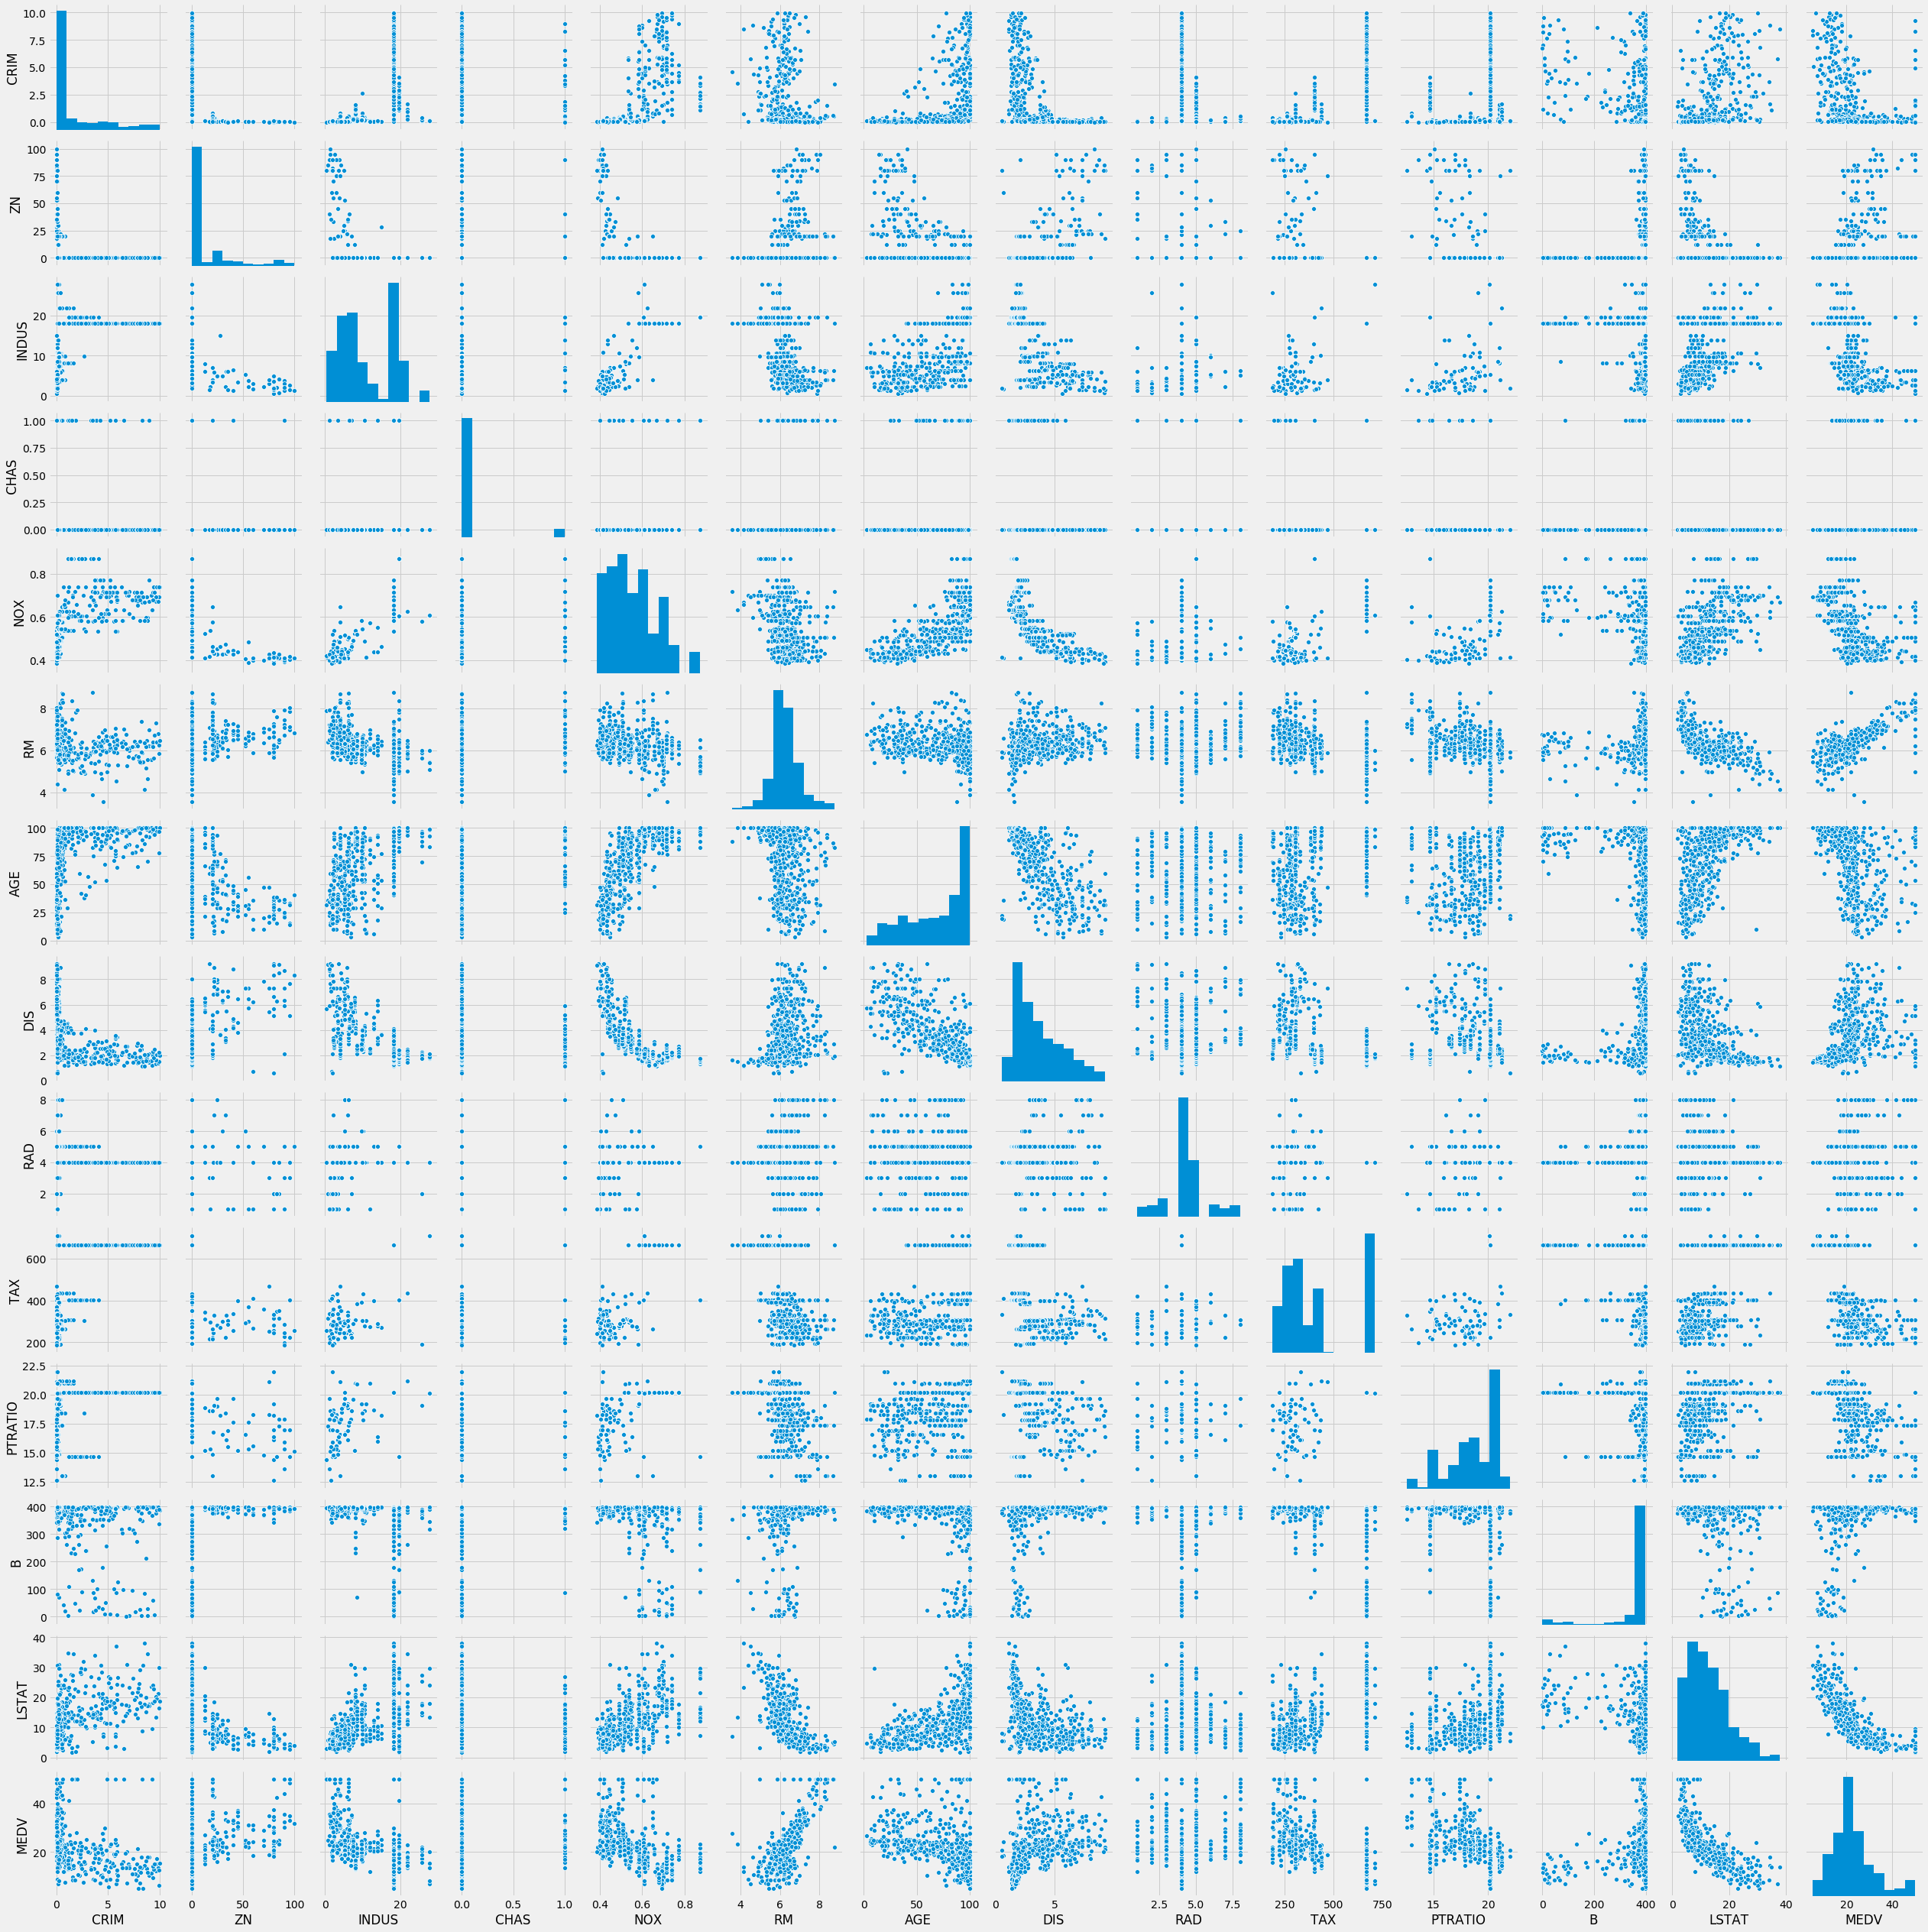

In [44]:
sns.pairplot(housing);

**Answer:** _What do each of the elements represent?  Is this more or less useful than the previous plot?_
> In a pair plot we get to see every relationship between every _pair_ of variables.  We can see this is very useful for quickly discovering which variables have some kind of correlation during an exploratory data analysis.  However, when just looking at the `INDUS` feature, the pair plot is more difficult to read and interpret as opposed to the single histogram.  

## Seaborn `heatmap`
---

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

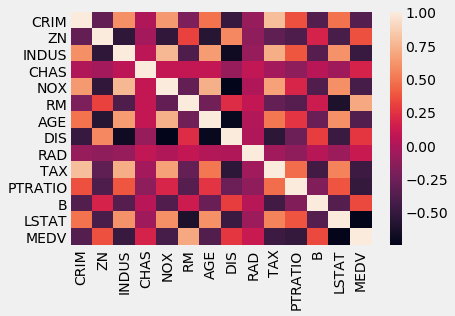

In [45]:
# Make a heatmap on the correlations between variables in the housing data:
housing_correlations = housing.corr();
sns.heatmap(housing_correlations);

<a id="matplotlib"></a>
## OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)

---

Matplotlib uses a blank canvas called a figure.

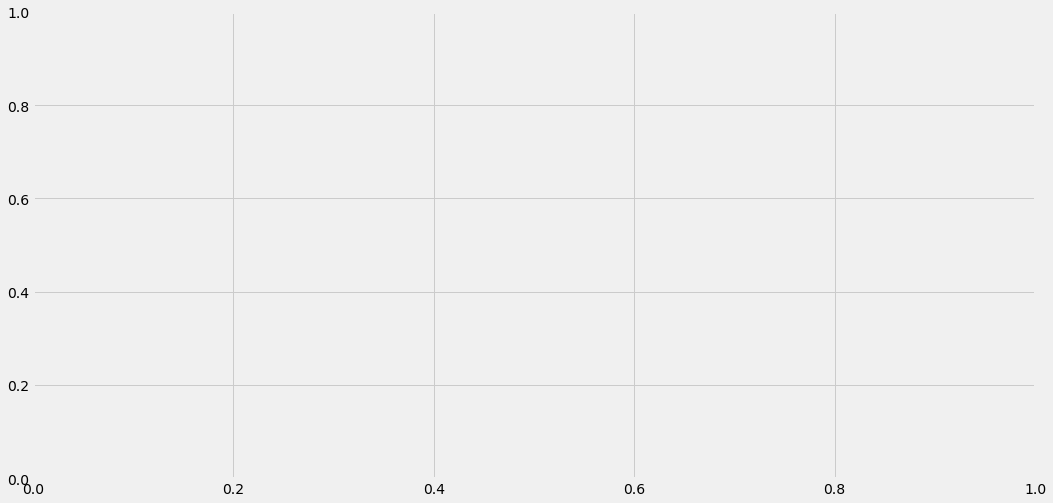

In [46]:
fig = plt.subplots(1,1, figsize=(16,8));

Within this canvas, we can contain smaller objects called axes.

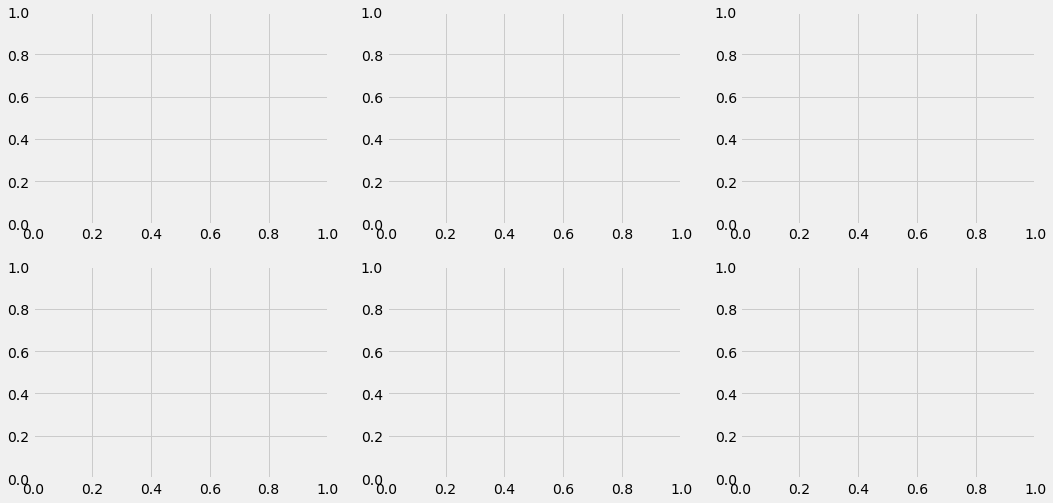

In [47]:
fig, axes = plt.subplots(2,3, figsize=(16,8));

Pandas allows us to plot to a specified axes if we pass the object to the ax parameter.

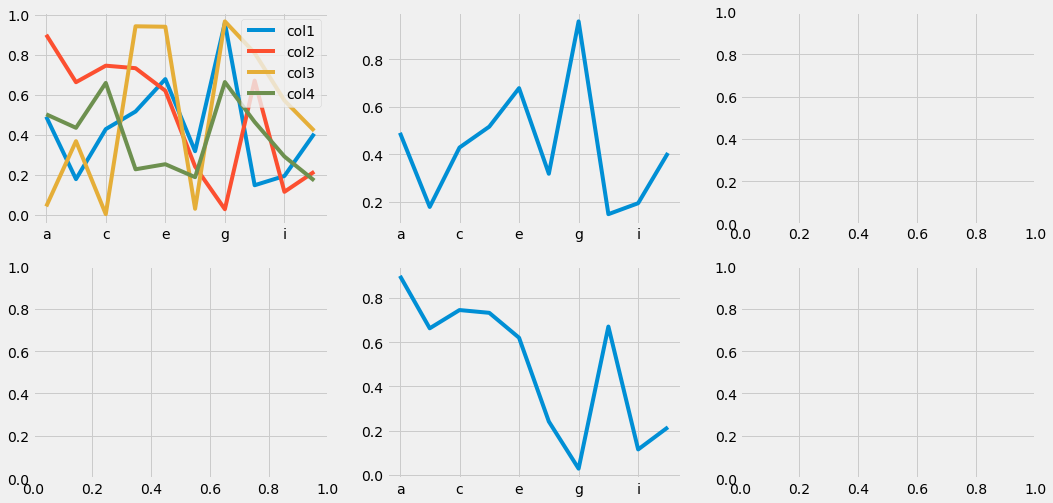

In [48]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
df.plot(ax=axes[0][0]);
df['col1'].plot(ax=axes[0][1]);
df['col2'].plot(ax=axes[1][1]);

## Let's use a bit more customization.
---

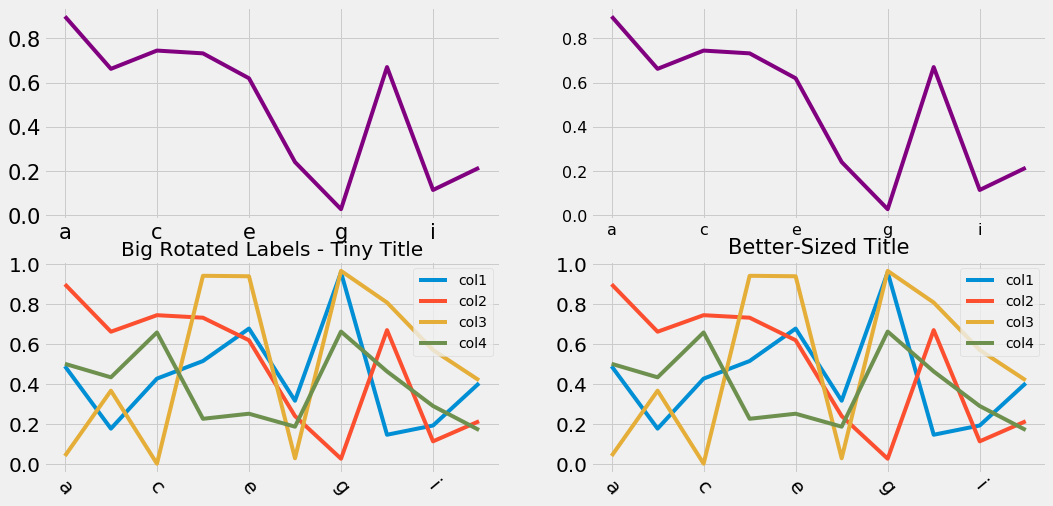

In [49]:
fig, axes = plt.subplots(2,2, figsize=(16,8))

# We can change the ticks' size.
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can change the label rotation.
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title',\
        fontsize=20, rot=-50, ax=axes[1][0])\

# We have to use ".set_title()" to fix title size.
df.plot(figsize=(16,8), fontsize=20, rot=-50, ax=axes[1][1])\
       .set_title('Better-Sized Title', fontsize=21, y=1.01);

<a id="additional-topics"></a>
## OPTIONAL: Additional Topics

In [ ]:
# Saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings');
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');
plt.savefig('beer_histogram.png');    # Save to file!

In [ ]:
# List available plot styles
plt.style.available

In [ ]:
# Change to a different style.
plt.style.use('ggplot')

<a id="summary"></a>
### Summary

In this lesson, we showed examples how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Box plots
- Special seaborn plots
- How Matplotlib works